## Lecture 1: Introduction to Neural Networks

### by Long Nguyen

This notebook is supplemental to Lecture 1 of the video series "Introduction to Neural Networks". These lectures are adapted from Michael Nielsen's free online book ["Neural Networks and Deep Learning"](http://neuralnetworksanddeeplearning.com/).

The video lecture can be access at [here](https://youtu.be/r5RRIYG4BJA).

### The MNIST Dataset

In [1]:
from mnist_loader import load_data_wrapper
import numpy as np
import matplotlib.pyplot as plt

In [2]:
training_data, validation_data, test_data = load_data_wrapper()

#### The variables training_data, validation_data and test_data above are each a list of (image, label) tuples where image and label are numpy arrays. We won't use the validation_data for this course.

#### How many images are in training_data? 


In [3]:
len(training_data)

50000

#### Unpack the first image into two variables img1, lb1. What is the shape of each image? What is the shape of each label? 

In [4]:
img1 = training_data[0][0]      # array of pixels
lb1 =  training_data[0][1]      # one-hot vector label            

# print out the shape of img1, lb1
print(img1.shape)
print(lb1.shape)

# or equivalently, unpacking the 2-tuple (image, label)
# img1, lb1 = training_data[0]


(784, 1)
(10, 1)


Both the image and its label are rank 2 numpy arrays of shape (781,1) and (10,1), respectively. A label is a one-hot encoding of the digit.  

#### Print out the lb1. What digit is this first image of the training set? 

In [5]:
print(lb1)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]


The function plot_mnist_digit below draw an MNIST image using the matplotlib library.  

In [10]:
def plot_image(image):
    """ Plot a single MNIST image. 
        Argument image is a numpy.ndarray of shape (784,1)
    """
    image = image.reshape(28,28)
    fig, ax = plt.subplots()
    ax.imshow(image, cmap=plt.cm.binary)


#### Call the function to plot the first image.

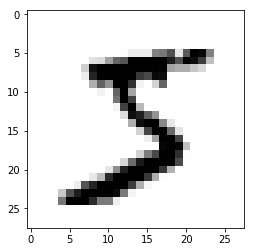

In [11]:
plot_image(img1)

In [19]:
training_data[0][1].shape

(10, 1)

In [12]:
def plot_images(images):
    """ Plot a list of MNIST images.
        Argument images is a list of (image, label) tuples. 
    """
    fig, axes = plt.subplots(nrows=1, ncols=len(images))
    for j, ax in enumerate(axes):
        ax.imshow(images[j][0].reshape(28,28), cmap = plt.cm.binary)
        ax.set_xticks([])
        ax.set_yticks([])

#### Call the function above to plot first 10 images.

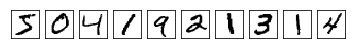

In [13]:
plot_images(training_data[0:10])

#### The sigmoid function is defined as $$\sigma(x)=\frac{1}{1+e^{-x}}.$$ Implement the sigmoid function. Hint: Use np.exp() for the exponential function. 

In [43]:
def sigmoid(x):
    """Returns the output of the sigmoid or logistic function."""
    return 1/(1+np.exp(-x))

Given a vector $\vec{x}\in\mathbb{R}^n$, the sigmoid function $\sigma:\mathbb{R}\rightarrow\mathbb{R}$ can be extended to a vector-valued function $\sigma:\mathbb{R}^n\rightarrow\mathbb{R}^n$ by applying $\sigma$ elementwise. 
That is, if
$$\vec{x}=\left[ \begin{array}{cccc}
x_{1} \\
x_{2} \\
\vdots \\
x_{m} 
\end{array} \right]$$
then
$$\sigma(\vec{x})=\left[ \begin{array}{cccc}
\sigma(x_{1}) \\
\sigma(x_{2}) \\
\vdots \\
\sigma(x_{m}) 
\end{array} \right].$$

Similarly, $\sigma$ can be applied to a $m\times n$ matrix elementwise. 

For example, if $$\vec{x}=\left[ \begin{array}{cccc}
1 \\
2 \\
3 
\end{array} \right]$$
then
$$\sigma(\vec{x})=\left[ \begin{array}{cccc}
\sigma(1) \\
\sigma(2) \\
\sigma(3) 
\end{array} \right]\approx\left[ \begin{array}{cccc}
0.73 \\
0.88 \\
0.95 
\end{array} \right]$$

In [44]:
x = np.array([[1],[2],[3]])
sigmoid(x)


array([[0.73105858],
       [0.88079708],
       [0.95257413]])

Define $f_1(\vec{x})=W_1\vec{x}+\vec{b}_1$ and $f_2(\vec{x})=W_2\vec{x}+\vec{b}_2$ for some $W_1, W_2, \vec{b}_1, \text{and } \vec{b}_2.$ 

Consider the classifier or score function $f=\sigma\circ f_2\circ\sigma\circ f_1:\mathbb{R}^{784}\rightarrow\mathbb{R}^{10}.$ This is a two-layer neural network. The score function takes a flattened MNIST image of shape `(784,1)` and output a one-hot vector of shape `(10,1)`. The class with the highest score is the label predicted by the classifier. 

The training a neural network amounts to producing a set parameters $W_1, W_2, \vec{b}_1, \text{and } \vec{b}_1$ whose score function $f(x; W_1, W_2, \vec{b}_1, \vec{b}_2)$ can accurately classify unseen images. 


##### To demonstrate an example of such a score function, let's load up a set of parameters that has already been trained. As we will see in a later lecture, the training involve examining 50,000 images 30 times. 

In [45]:
with open("parameters.npy", mode="rb") as r:
    parameters = np.load(r)
    W1, B1, W2, B2 = parameters

#### Implement the score function with these set of parameters. 

In [46]:
def f(x, W1, W2, B1, B2):
    """Return the output of the network if ``x`` is input image and
    W1, W2, B1 and B2 are the learnable parameters or weights. """
    Z1 = np.dot(W1, x) + B1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + B2
    A2 = sigmoid(Z2)
    return A2

#### Apply your score function above to the first two images. Does it classify them correctly?  

In [48]:
f(training_data[0][0],W1,W2,B1,B2)

array([[6.68932951e-06],
       [4.91861537e-08],
       [2.13952089e-08],
       [4.12030050e-01],
       [2.31929604e-09],
       [9.93000368e-01],
       [3.75187346e-12],
       [1.12372205e-04],
       [2.81225375e-10],
       [2.15424607e-07]])

In [51]:
np.argmax(f(training_data[10][0],W1,W2,B1,B2))

3

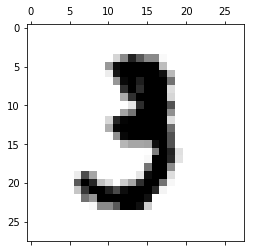

In [52]:
plot_image(training_data[10][0])

In [54]:
def predict(images, W1, W2, B1, B2):
    """Return the predictions for a list of images given the parameters.
    """
    predictions = []  # empty list
    for im in images:
        a = f(im[0], W1, W2, B1, B2)
        predictions.append(np.argmax(a)) # add prediction to predictions list
    return predictions

In [56]:
predict(training_data[0:10],W1,W2,B1,B2)

[5, 0, 4, 1, 9, 2, 1, 3, 1, 4]

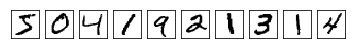

In [57]:
plot_images(training_data[0:10])